In [2]:
import laspy
import open3d as o3d
import numpy as np

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


# Loading and Understanding

In [3]:
las = laspy.read('data/HT412_1743085214_3237183_1427127638184903_1427127806163693.las')
las

<LasData(1.2, point fmt: <PointFormat(0, 0 bytes of extra dims)>, 64677749 points, 1 vlrs)>

In [3]:
list(las.point_format.dimension_names)

['X',
 'Y',
 'Z',
 'intensity',
 'return_number',
 'number_of_returns',
 'scan_direction_flag',
 'edge_of_flight_line',
 'classification',
 'synthetic',
 'key_point',
 'withheld',
 'scan_angle_rank',
 'user_data',
 'point_source_id']

In [4]:
point_map = np.stack([las.X, las.Y, las.Z], axis=0).T
point_map[:10]

array([[    0,     0,     0],
       [  -89,    19,     0],
       [ -185,    41,    -3],
       [ -281,    61,     0],
       [ -386,    83,     0],
       [ -500,   109,     0],
       [ -629,   137,    -2],
       [ -762,   166,    -2],
       [ -906,   197,     0],
       [-1054,   229,     1]], dtype=int32)

In [5]:
point_map[:, 0].min(), point_map[:, 0].max()

(np.int32(-10529), np.int32(1869175))

In [6]:
point_map[:, 1].min(), point_map[:, 1].max()

(np.int32(-852964), np.int32(24851))

# Visualizing

In [7]:
import matplotlib.pyplot as plt

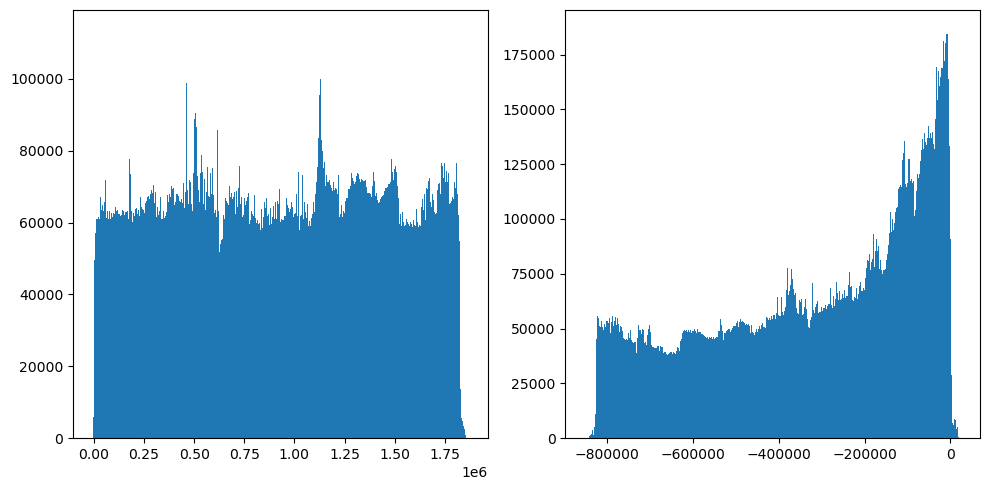

In [8]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1); plt.hist(point_map[:, 0], bins=1000)
plt.subplot(1, 2, 2); plt.hist(point_map[:, 1], bins=1000)
plt.tight_layout()
plt.show()

In [55]:
geom = o3d.geometry.PointCloud()
geom.points = o3d.utility.Vector3dVector(point_map[subset_mask])
o3d.visualization.draw_geometries([geom])

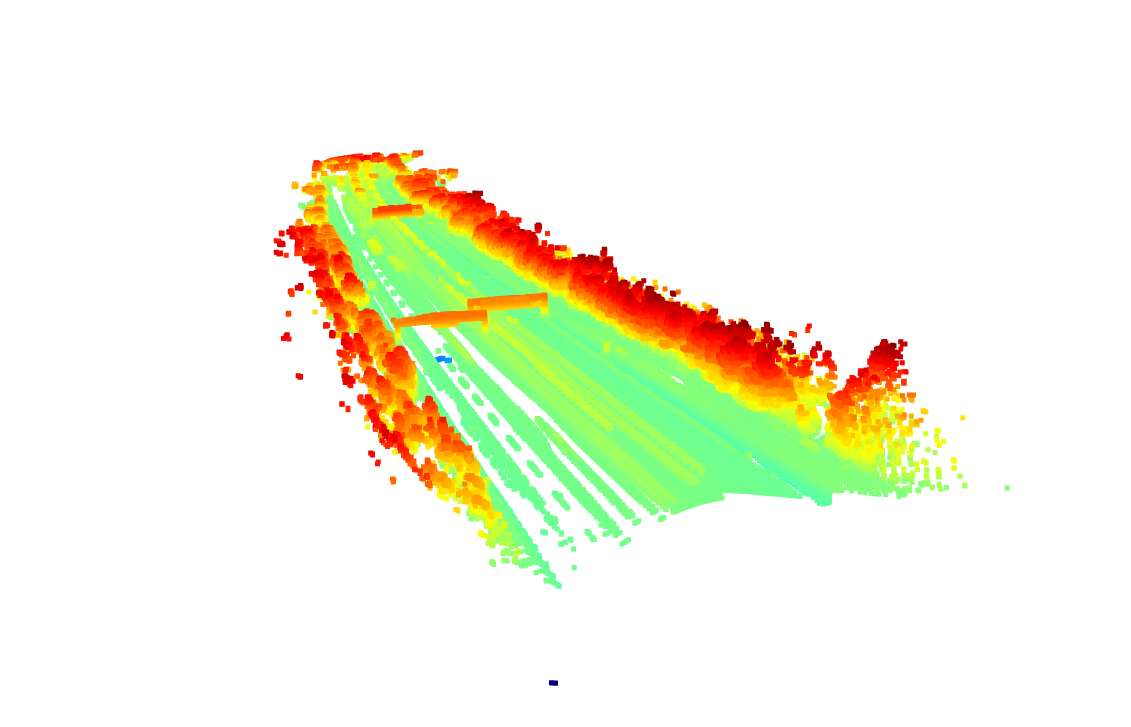

In [51]:
subset_mask2 = (point_map[:, 0] >= 500000) & (point_map[:, 0] < 1000000)
subset_mask2.sum()

np.int64(17353439)

In [52]:
geom2 = o3d.geometry.PointCloud()
geom2.points = o3d.utility.Vector3dVector(point_map[subset_mask2])
o3d.visualization.draw_geometries([geom2])

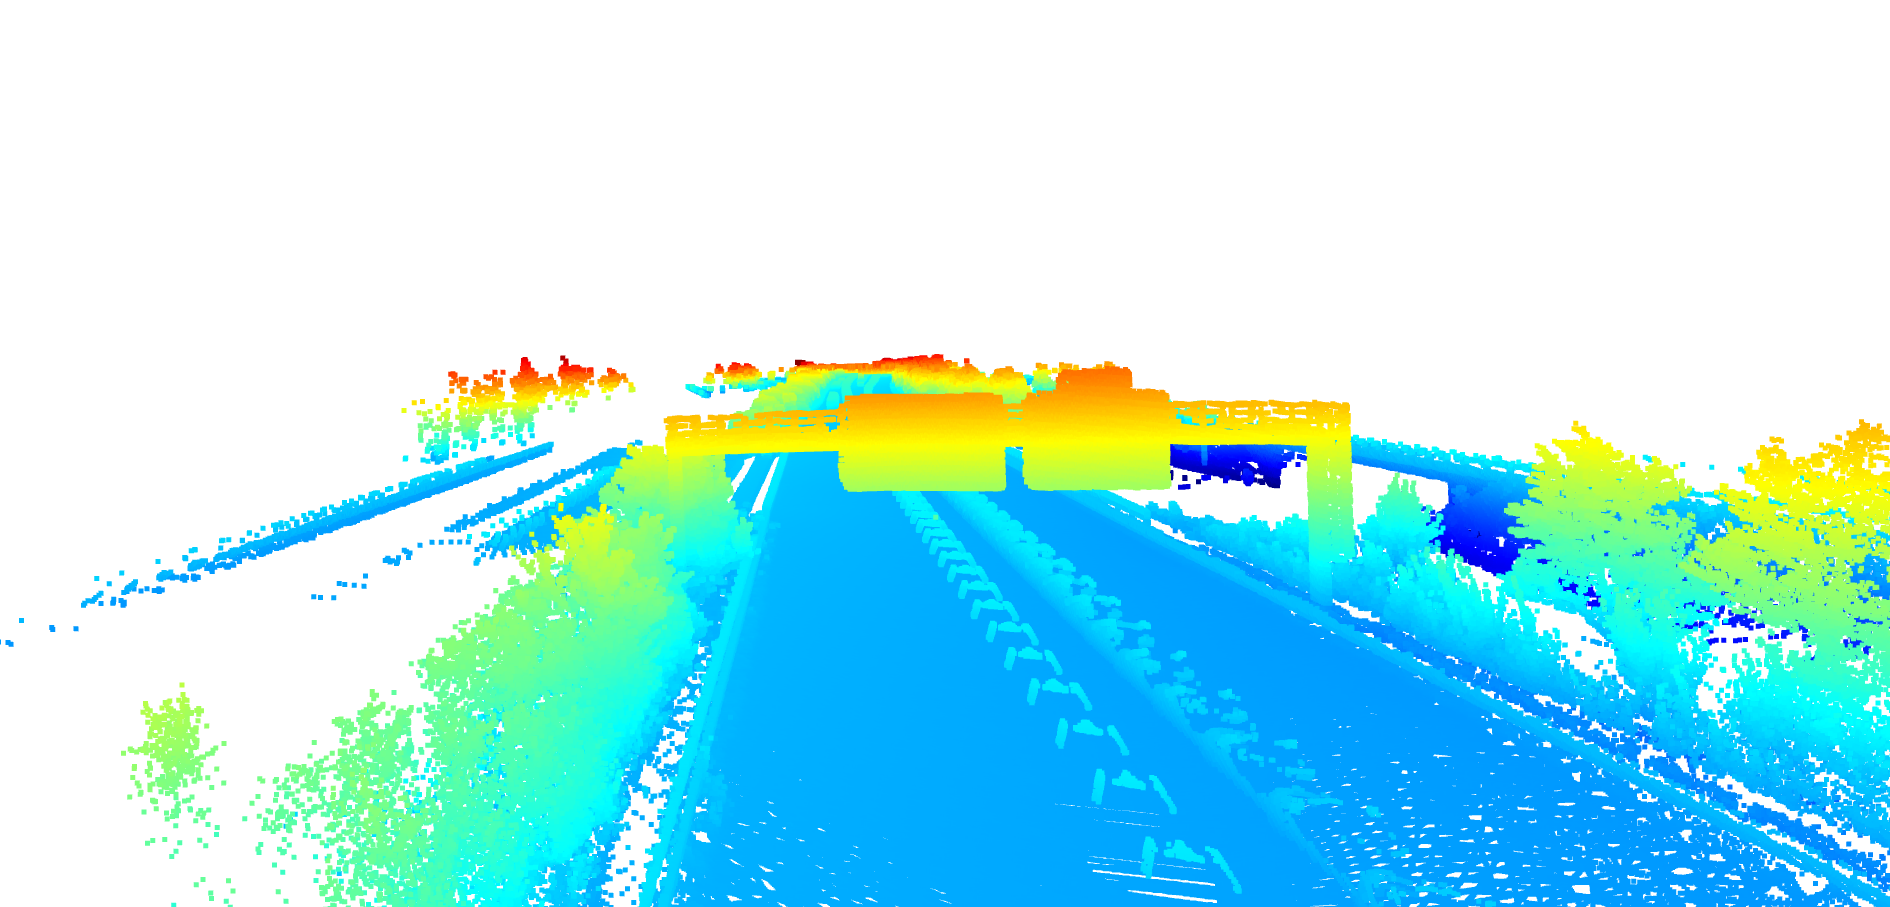

# Exploring Features

In [10]:
list(las.point_format.dimension_names)

['X',
 'Y',
 'Z',
 'intensity',
 'return_number',
 'number_of_returns',
 'scan_direction_flag',
 'edge_of_flight_line',
 'classification',
 'synthetic',
 'key_point',
 'withheld',
 'scan_angle_rank',
 'user_data',
 'point_source_id']

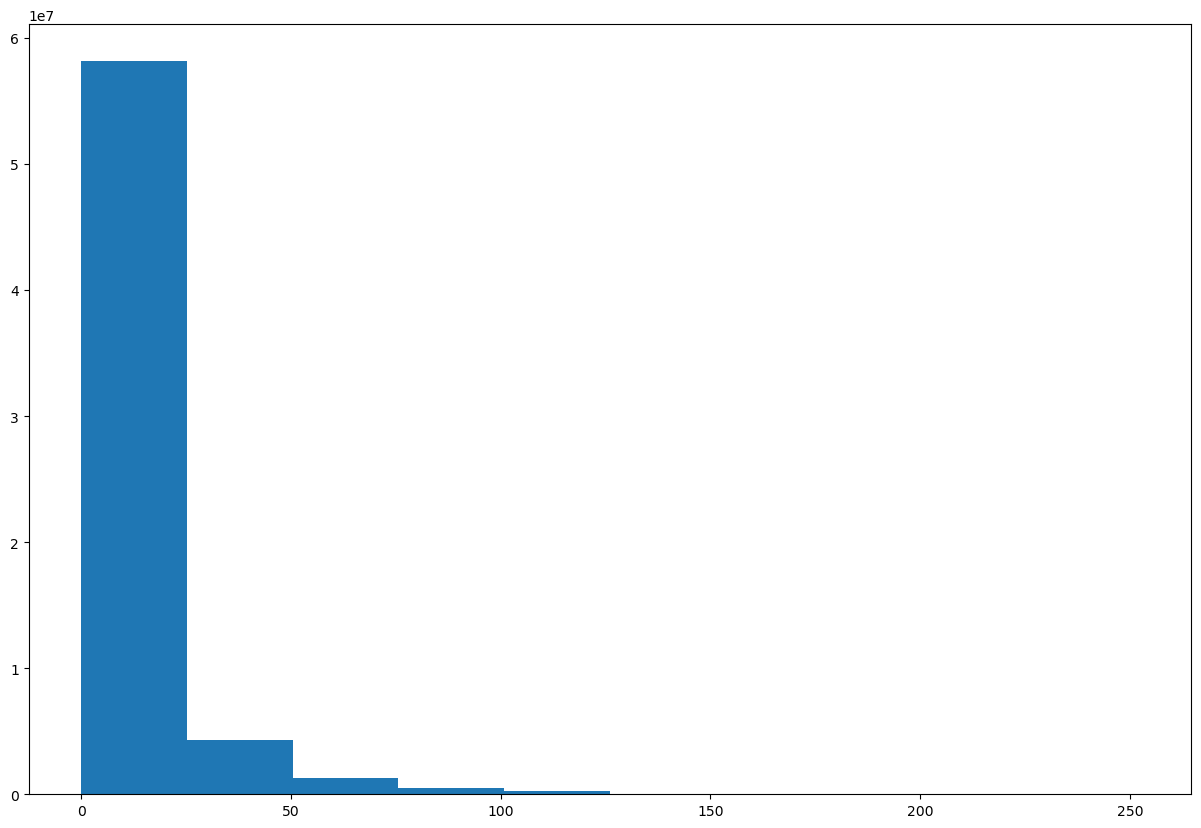

In [11]:
plt.figure(figsize=(15, 10))
plt.hist(las.intensity)
plt.show()

In [12]:
las.return_number.min(), las.return_number.max()

(np.uint8(1), np.uint8(1))

In [13]:
las.number_of_returns.min(), las.number_of_returns.max()

(np.uint8(1), np.uint8(1))

In [14]:
las.scan_angle_rank.min(), las.scan_angle_rank.max()

(np.int8(-128), np.int8(127))

In [15]:
las.scan_direction_flag.min(), las.scan_direction_flag.max()

(np.uint8(0), np.uint8(0))

In [16]:
las.edge_of_flight_line.min(), las.edge_of_flight_line.max()

(np.uint8(0), np.uint8(0))

In [17]:
las.classification.min(), las.classification.max()

(np.uint8(0), np.uint8(0))

In [18]:
las.synthetic.min(), las.synthetic.max()

(np.uint8(0), np.uint8(0))

In [19]:
las.key_point.min(), las.key_point.max()

(np.uint8(0), np.uint8(0))

In [20]:
las.withheld.min(), las.withheld.max()

(np.uint8(0), np.uint8(0))

In [21]:
las.point_source_id.min(), las.point_source_id.max()

(np.uint16(0), np.uint16(31))

In [22]:
np.unique(las.point_source_id, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
       dtype=uint16),
 array([2350608, 2146627, 2325471, 2125266, 2285841, 2058487, 2250959,
        2024896, 2199347, 1986388, 2194016, 1945428, 2163548, 1896328,
        2153100, 1822747, 2174076, 1794144, 2192120, 1782448, 2138343,
        1745391, 2118901, 1670489, 2226530, 1638840, 2305230, 1634930,
        2245332, 1406324, 2221695, 1453899]))

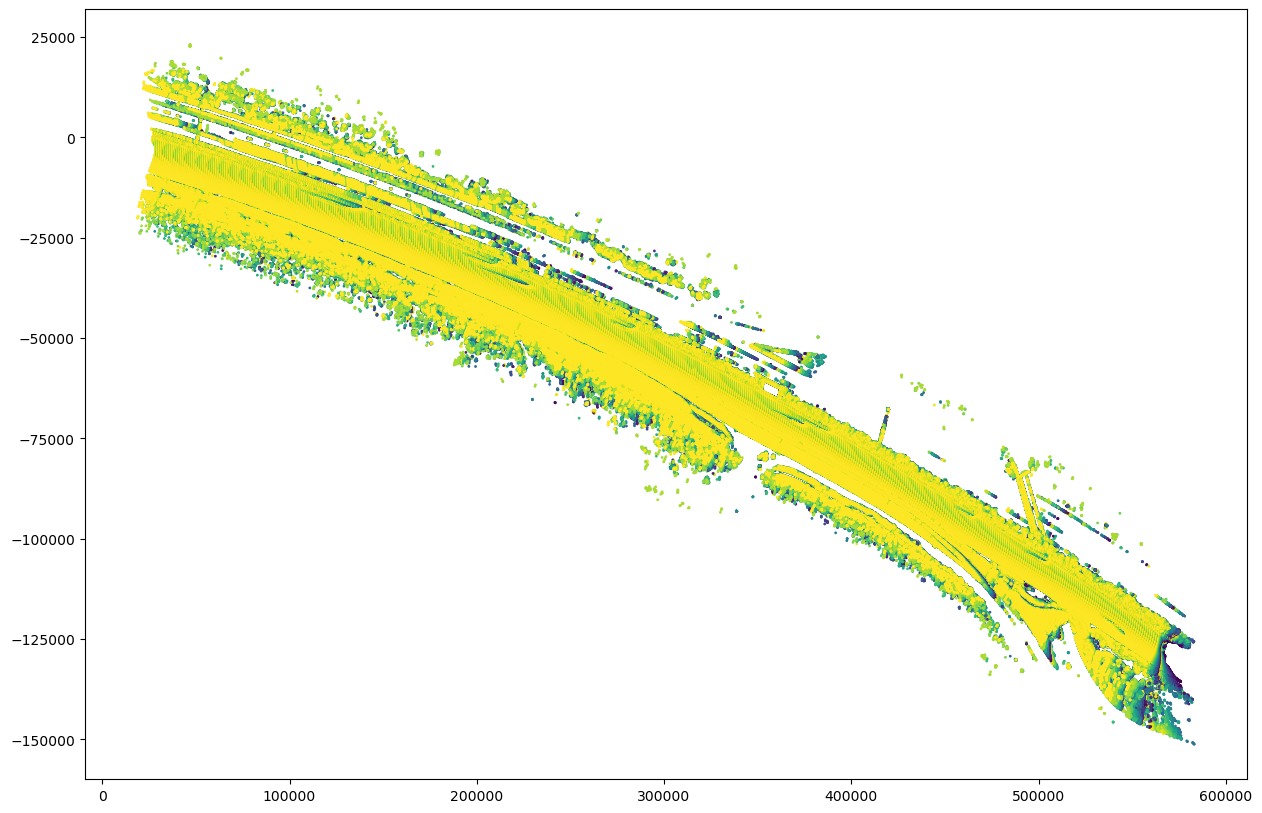

In [23]:
point_data2d = np.stack([las.X, las.Y], axis=0).T
plt.figure(figsize=(15, 10))
plt.scatter(point_data2d[1000000:20000000, 0], point_data2d[1000000:20000000, 1], c=las.point_source_id[1000000:20000000], s=1)
plt.show()

In [24]:
np.unique(las.user_data, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=uint8),
 array([5390724, 5389780, 5389909, 5389907, 5389592, 5389180, 5389778,
        5389748, 5389729, 5389356, 5390019, 5390027]))

In [25]:
np.stack([las.X, las.Y], axis=0).T.shape

(64677749, 2)

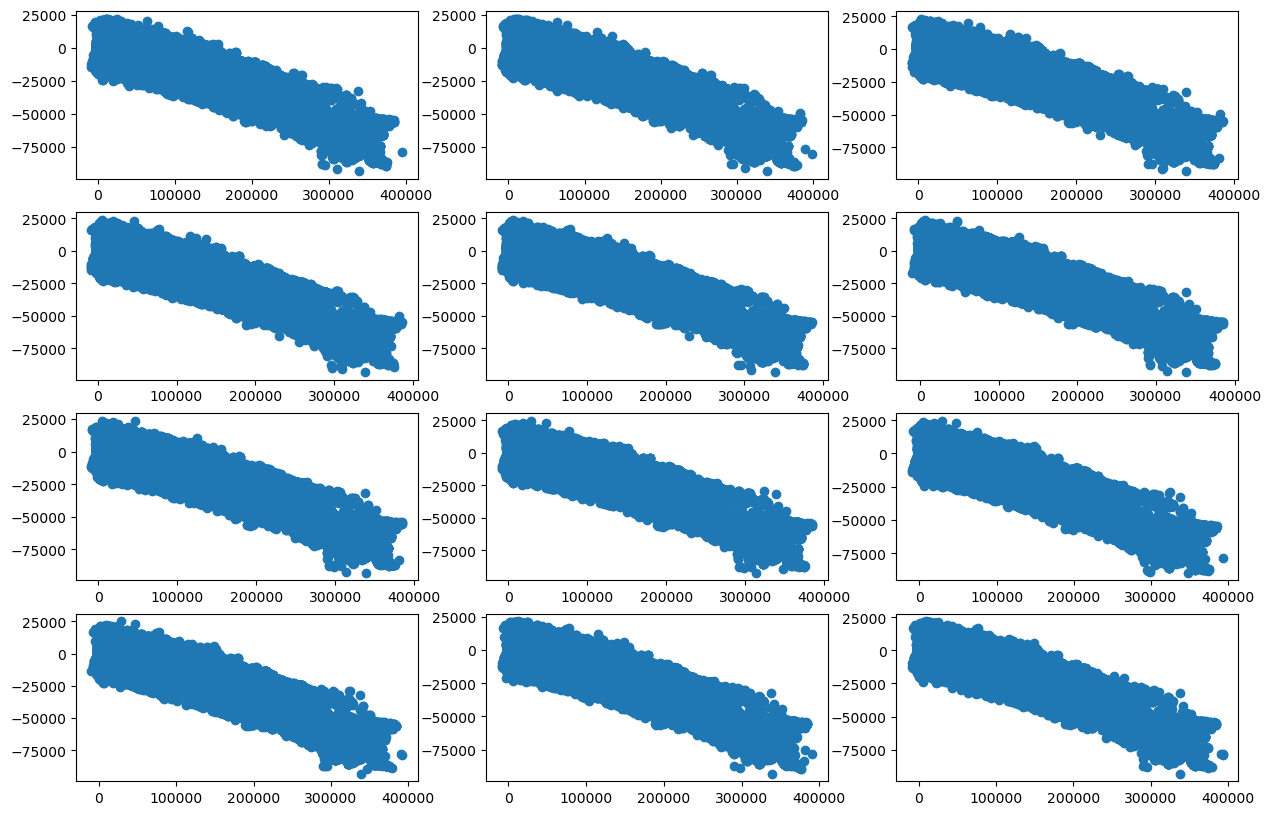

In [26]:
fig, ax = plt.subplots(4, 3, figsize=(15, 10))
ax = ax.flatten()

point_data2d = np.stack([las.X, las.Y], axis=0).T
for i in np.unique(las.user_data):
    mask = (las.user_data == i)
    point_data_subset = point_data2d[mask]
    ax[i].scatter(point_data_subset[:1000000,0], point_data_subset[:1000000,1])
plt.show()

# Understaning Important Features

In [4]:
import pandas as pd

data = np.stack([las.X, las.Y, las.Z, las.intensity, las.scan_angle_rank, las.user_data, las.point_source_id], axis=0).T
data = pd.DataFrame(data)
data.columns = ['X',
                'Y',
                'Z',
                'intensity',
                'scan_angle_rank',
                'user_data',
                'point_source_id']

In [29]:
data.head()

,X,Y,Z,intensity,scan_angle_rank,user_data,point_source_id
0,0,0,0,11,50,0,1
1,-89,19,0,17,50,0,3
2,-185,41,-3,15,50,0,5
3,-281,61,0,12,50,0,7
4,-386,83,0,14,49,0,9


## Intensity

In [43]:
intensity = data.iloc[:1000000, 3].values.astype(np.float32)
intensity_norm = (intensity - intensity.min()) / (intensity.max() - intensity.min())

# Convert to Nx3 RGB array (grayscale)
colors = np.stack([intensity_norm]*3, axis=1)  # shape: (N, 3)

In [44]:
geom = o3d.geometry.PointCloud()
geom.points = o3d.utility.Vector3dVector(data.iloc[:1000000, :3].values)
geom.colors = o3d.utility.Vector3dVector(colors)
o3d.visualization.draw_geometries([geom])

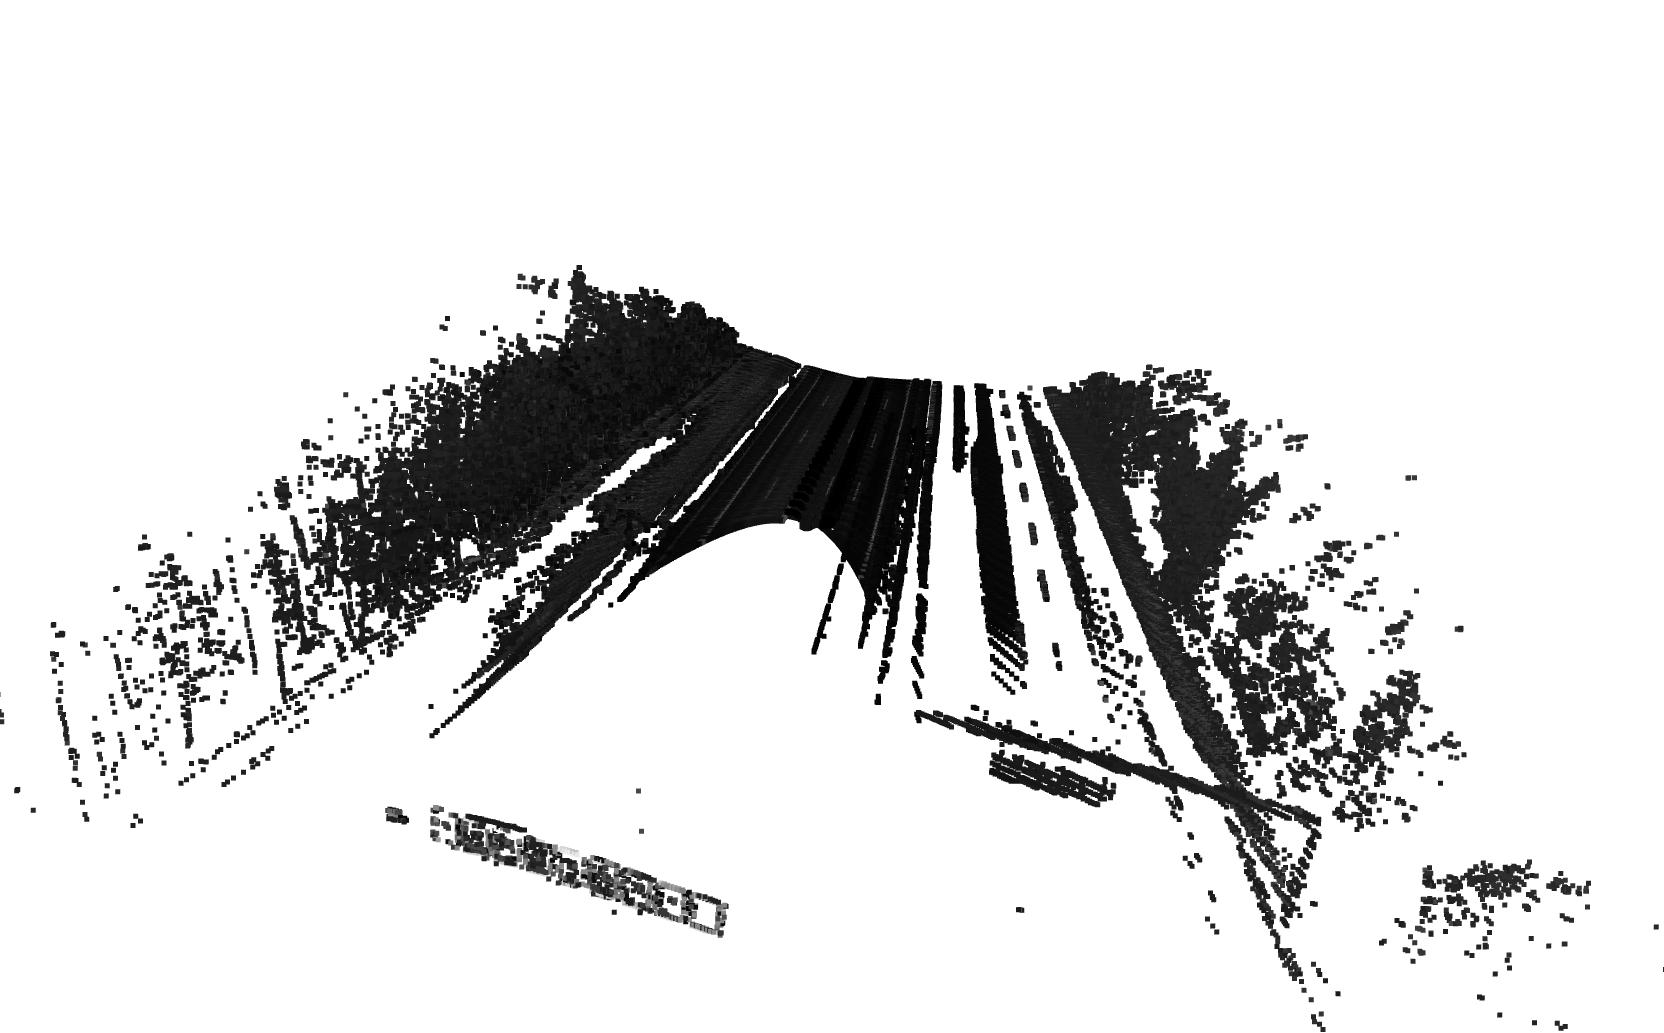

## Intensity and Height

In [45]:
z = data.iloc[:100000, 2].values.astype(np.float32)
z_norm = (z - z.min()) / (z.max() - z.min())

intensity = data.iloc[:100000, 3].values.astype(np.float32)
intensity_norm = (intensity - intensity.min()) / (intensity.max() - intensity.min())

# Map Z to a colormap (e.g., plasma)
cmap = plt.get_cmap('plasma')
colors_z = cmap(z_norm)[:, :3]  # (N, 3)

# Scale color brightness by intensity
colors_combined = colors_z * intensity_norm[:, np.newaxis]

# Clip to [0,1]
colors_combined = np.clip(colors_combined, 0, 1)

# Assign to Open3D
geom = o3d.geometry.PointCloud()
geom.points = o3d.utility.Vector3dVector(data.iloc[:1000000, :3].values)
geom.colors = o3d.utility.Vector3dVector(colors_combined)
o3d.visualization.draw_geometries([geom])

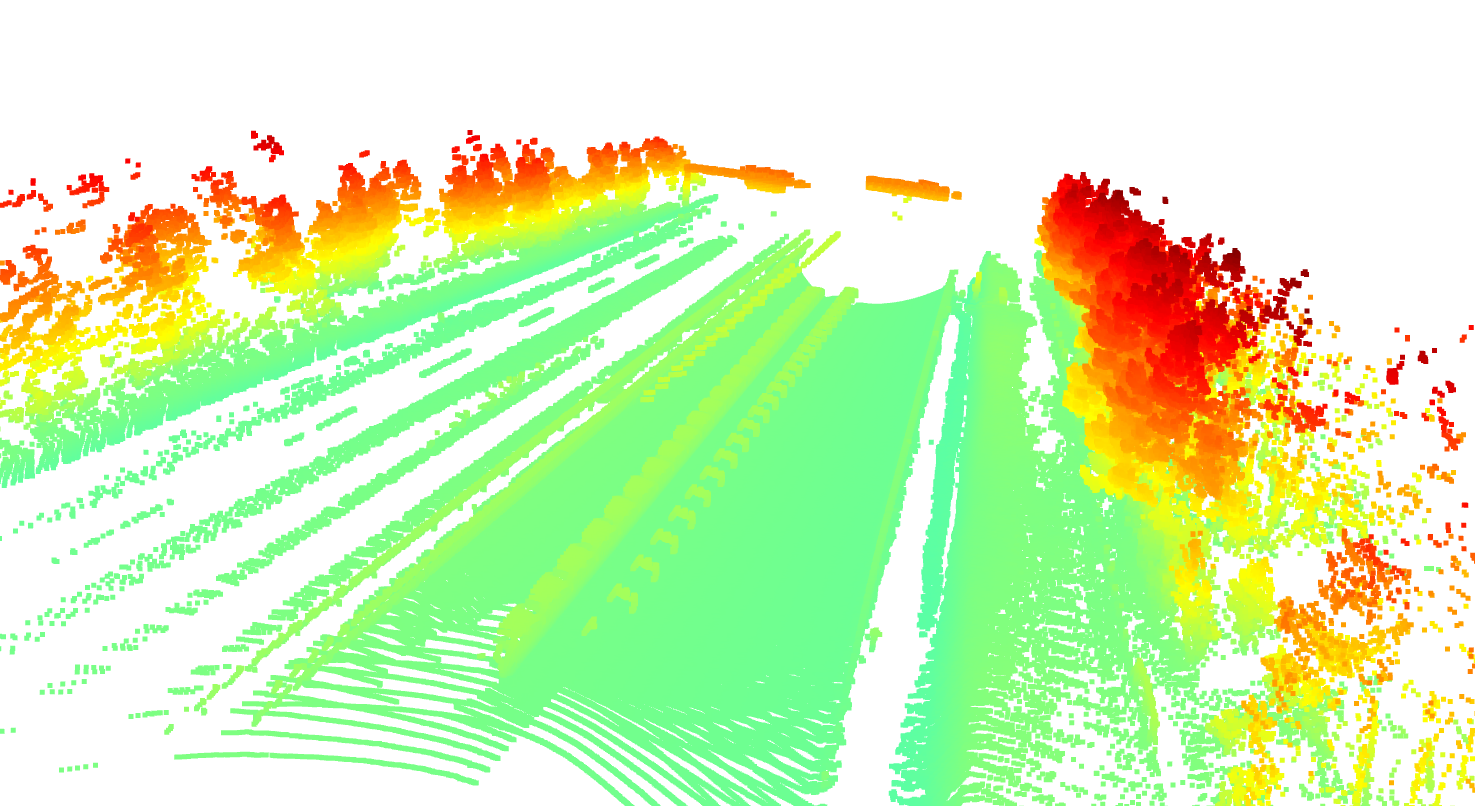

## Scan Angle

In [48]:
data['scan_angle_rank'].min(), data['scan_angle_rank'].max()

(np.int32(-128), np.int32(127))

<Axes: >

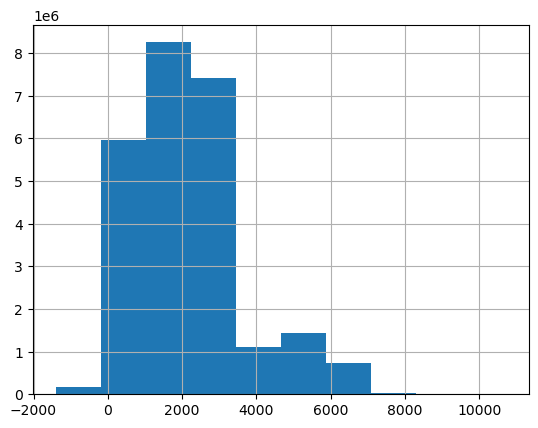

In [59]:
center['Z'].hist()

In [5]:
center = data[abs(data['scan_angle_rank']) < 45]
center = center[(center['intensity'] < 10) | (center['intensity'] > 230)]

In [6]:
center.shape

(10244841, 7)

In [7]:
intensity = center.iloc[:, 3].values.astype(np.float32)
intensity_norm = (intensity - intensity.min()) / (intensity.max() - intensity.min())

# Convert to Nx3 RGB array (grayscale)
colors = np.stack([intensity_norm]*3, axis=1)  # shape: (N, 3)

geom = o3d.geometry.PointCloud()
geom.points = o3d.utility.Vector3dVector(center.iloc[:, :3].values)
geom.colors = o3d.utility.Vector3dVector(colors)
o3d.visualization.draw_geometries([geom])

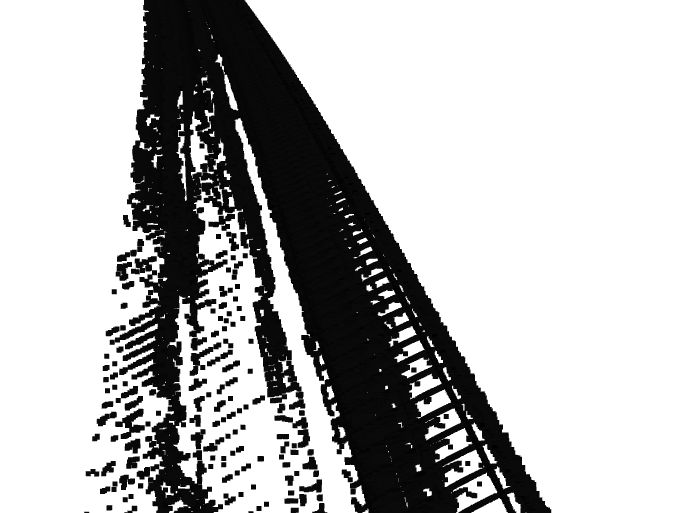